In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
# import libraries
import numpy as np
import matplotlib.pyplot as plt
import pyshtools as pysh
import SLmod as SL
from numpy import pi as pi

#set plotting parameters
plt.rc('xtick', labelsize=18) 
plt.rc('ytick', labelsize=18) 
font = {'size'   : 20}
plt.rc('font', **font)
plt.rcParams['figure.figsize'] = [16, 8]

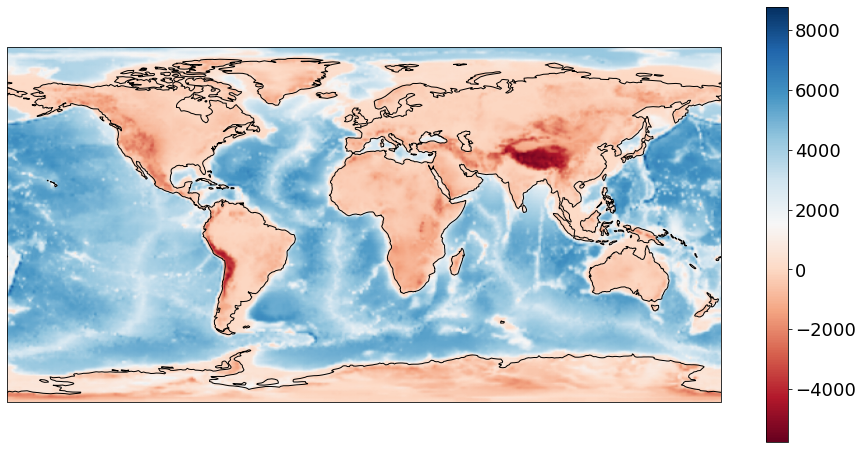

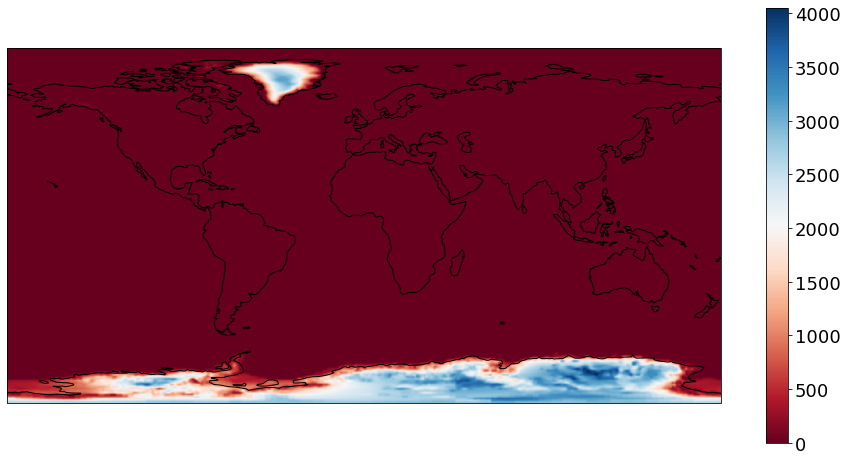

In [3]:
L=256
sl0,ice0 = SL.get_sl_ice_data(L)
SL.plot(sl0)
SL.plot(ice0)

In [4]:
C = SL.ocean_function(sl0,ice0)
A = SL.surface_integral(C)
A_earth = 4*pi*SL.b**2
print('fraction of surface which is ocean = ',A/A_earth)

fraction of surface which is ocean =  0.712960233719624


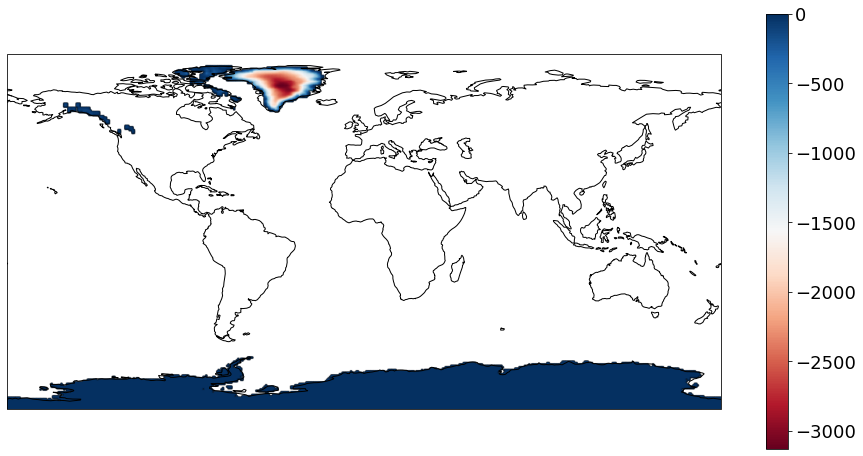

In [8]:
# set covariance for a random field
#Q = SL.laplace_covariance(L,std = 1.,s = 2,mu = 0.1) 

# build a random melt geometry
#ice = SL.random_field(Q)*SL.ice_mask(sl0,ice0,0.)

ice = -1*SL.zero_southern_hemisphere(ice0)

# plot the result with suitable mask
ice_mask = SL.ice_mask(sl0,ice0)
SL.plot(ice_mask*ice)

iteration =  1 relative change =  0.02075230497363654
iteration =  2 relative change =  0.0025119189708965755
iteration =  3 relative change =  0.0004209094593405218
iteration =  4 relative change =  8.310105021661945e-05
iteration =  5 relative change =  1.8083394636502194e-05
iteration =  6 relative change =  4.243670406640295e-06
iteration =  7 relative change =  1.0687214218997592e-06
iteration =  8 relative change =  2.8727975151983435e-07


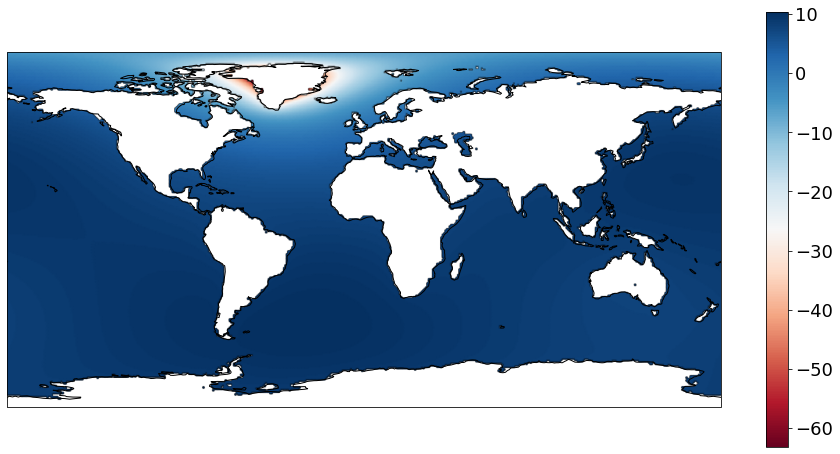

iteration =  1 relative change =  0.019891664486826062
iteration =  2 relative change =  0.00206551369836319
iteration =  3 relative change =  0.00028513086113610457
iteration =  4 relative change =  4.407554176229875e-05
iteration =  5 relative change =  7.305146892569449e-06
iteration =  6 relative change =  1.2684338651453796e-06
iteration =  7 relative change =  2.2652603014314584e-07


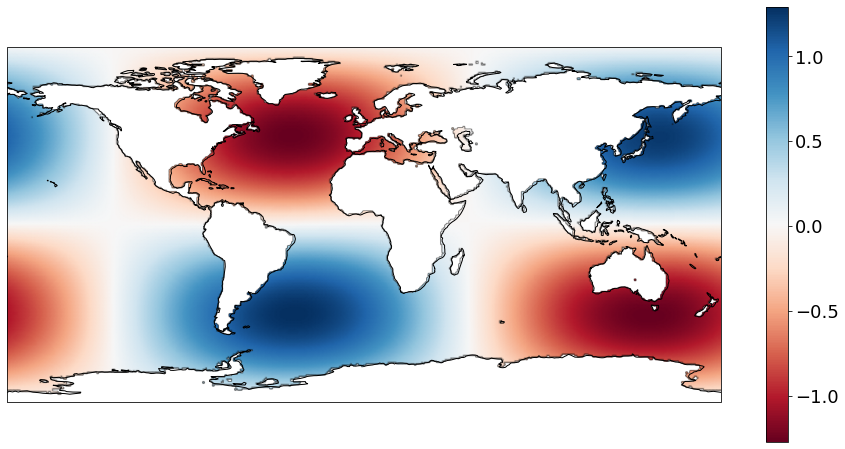

In [11]:
# set the direct load
zeta   = SL.rhoi*(1-C)*ice
# solve the fingerprint problem
sl,_,_,_,_ = SL.fingerprint(C,zeta)
ocean_mask = SL.ocean_mask(sl0,ice0)
SL.plot(ocean_mask*sl)

sl2,_,_,_,_ = SL.fingerprint(C,zeta,rotation=False)

SL.plot(ocean_mask*(sl-sl2))


iteration =  1 relative change =  0.03398999834966157
iteration =  2 relative change =  0.002354786004365731
iteration =  3 relative change =  0.0003237505365432555
iteration =  4 relative change =  6.348444246187159e-05
iteration =  5 relative change =  1.4564296353029486e-05
iteration =  6 relative change =  3.590850240023247e-06
iteration =  7 relative change =  9.302833465650741e-07


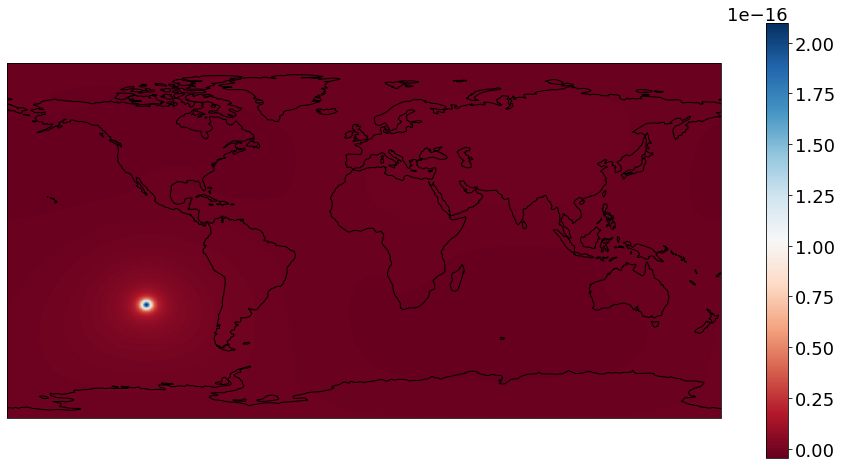

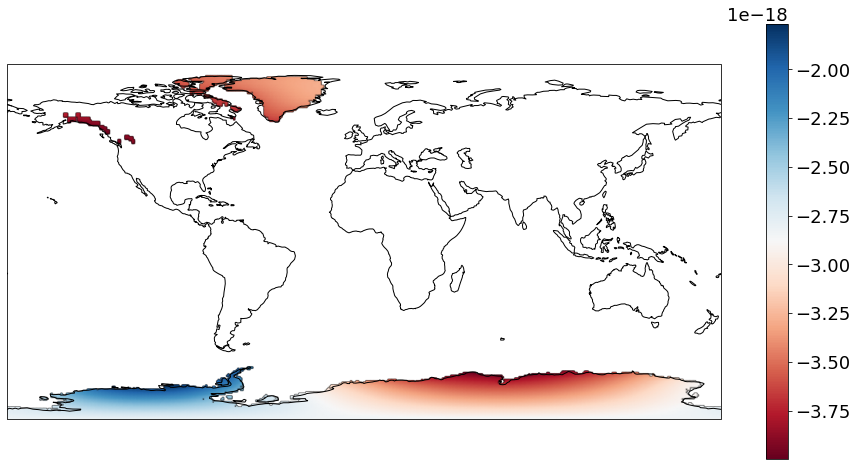

0.00635490572210838 0.006354843845393871 9.736842246749464e-06


In [24]:
# set the observation point and set the adjoint loads
lats = np.zeros(1)
lons = np.zeros(1)
lats[0] =  -32.48
lons[0] =  -109.75

zeta_d   = SL.point_load(L,lats,lons,angle = 2)

# act the adjoint load on the sea level to get the observation
J =   SL.surface_integral(zeta_d*sl) 

sl_d,_,_,_,_ = SL.fingerprint(C,zeta_d)
SL.plot(sl_d)
SL.plot(ice_mask*sl_d)


# act the load on the adjoint sea level
J2 =   SL.surface_integral(zeta*sl_d)          

# compare the two values
print(J,J2,np.abs(J-J2)/np.abs(J))